In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import math
import scipy #this gives the access to probability

C:\Users\Dr. J P Singh\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


1. Understanding the Dataset

A. Load and scrutinize the dataset to comprehend its structure, encompassing columns and data types.

In [2]:
df_bank = pd.read_csv("F:\Hero Vired - Data Science and Business Analytics Course\Graded Project\Python Project\EDA Python Project\\bank_marketing.csv")
df_bank

C:\Users\Dr. J P Singh\AppData\Local\Temp\ipykernel_6448\2250387442.py:1: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bank = pd.read_csv("F:\Hero Vired - Data Science and Business Analytics Course\Graded Project\Python Project\EDA Python Project\\bank_marketing.csv")


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [3]:
#We make the second row as a header because it contains the column heading
#So we use header=2 as the heading of columns are in 2nd row.
df_bank = pd.read_csv("F:\Hero Vired - Data Science and Business Analytics Course\Graded Project\Python Project\EDA Python Project\\bank_marketing.csv",header=2)
df_bank

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [4]:
df_bank.columns

Index(['customerid', 'age', 'salary', 'balance', 'marital', 'jobedu',
       'targeted', 'default', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [5]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

B. Inspect for any instances of missing values, outliers, or data inconsistencies.

First we will change the time unit into 1 format for all time duration

In [6]:
df_bank = pd.read_csv("F:\Hero Vired - Data Science and Business Analytics Course\Graded Project\Python Project\EDA Python Project\\bank_marketing.csv",header=2)

def convert_to_seconds(duration):
    duration = duration.strip()  # Remove leading and trailing whitespaces
    if 'sec' in duration:
        return int(float(duration.split('sec')[0]))  # Convert to float first to handle decimals
    elif 'min' in duration:
        return int(float(duration.split('min')[0]) * 60)
    else:
        return None  # Handle cases with unknown format or missing values

df_bank['duration_seconds'] = df_bank['duration'].apply(convert_to_seconds)

# Drop the original 'duration' column
df_bank.drop('duration', axis=1, inplace=True)

Now we seperate the categorical column and Numerical columns and inspect the value count for each categorical column 

In [7]:
#Seperating the column jobedu, so we can get seperate column of department and education
df_bank[["department","education"]] =df_bank["jobedu"].str.split(",",expand=True)
#seperating thecolumn month, so we can get month and year seperately
df_bank[["Month","year"]] = df_bank["month"].str.split(",",expand=True)
# Drop the original 'jobedu' & 'month' column
df_bank.drop('jobedu', axis=1, inplace=True)
df_bank.drop('month', axis=1, inplace=True)

In [8]:
pd.set_option('display.max_columns', None)
df_bank

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,campaign,pdays,previous,poutcome,response,duration_seconds,department,education,Month,year
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,1,-1,0,unknown,no,261,management,tertiary,may,2017
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,5,1,-1,0,unknown,no,151,technician,secondary,may,2017
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,1,-1,0,unknown,no,76,entrepreneur,secondary,may,2017
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,5,1,-1,0,unknown,no,92,blue-collar,unknown,may,2017
4,5,33.0,0,1,single,no,no,no,no,unknown,5,1,-1,0,unknown,no,198,unknown,unknown,may,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,yes,no,no,no,cellular,17,3,-1,0,unknown,yes,976,technician,tertiary,nov,2017
45207,45208,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,2,-1,0,unknown,yes,456,retired,primary,nov,2017
45208,45209,72.0,55000,5715,married,yes,no,no,no,cellular,17,5,184,3,success,yes,1126,retired,secondary,nov,2017
45209,45210,57.0,20000,668,married,yes,no,no,no,telephone,17,4,-1,0,unknown,no,508,blue-collar,secondary,nov,2017


In [9]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        45211 non-null  int64  
 1   age               45191 non-null  float64
 2   salary            45211 non-null  int64  
 3   balance           45211 non-null  int64  
 4   marital           45211 non-null  object 
 5   targeted          45211 non-null  object 
 6   default           45211 non-null  object 
 7   housing           45211 non-null  object 
 8   loan              45211 non-null  object 
 9   contact           45211 non-null  object 
 10  day               45211 non-null  int64  
 11  campaign          45211 non-null  int64  
 12  pdays             45211 non-null  int64  
 13  previous          45211 non-null  int64  
 14  poutcome          45211 non-null  object 
 15  response          45181 non-null  object 
 16  duration_seconds  45211 non-null  int64 

In [10]:
#changing Dtype of day &customerid column
df_bank['day'] = df_bank['day'].astype(object)
df_bank['customerid'] = df_bank['customerid'].astype(object)

In [11]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        45211 non-null  object 
 1   age               45191 non-null  float64
 2   salary            45211 non-null  int64  
 3   balance           45211 non-null  int64  
 4   marital           45211 non-null  object 
 5   targeted          45211 non-null  object 
 6   default           45211 non-null  object 
 7   housing           45211 non-null  object 
 8   loan              45211 non-null  object 
 9   contact           45211 non-null  object 
 10  day               45211 non-null  object 
 11  campaign          45211 non-null  int64  
 12  pdays             45211 non-null  int64  
 13  previous          45211 non-null  int64  
 14  poutcome          45211 non-null  object 
 15  response          45181 non-null  object 
 16  duration_seconds  45211 non-null  int64 

1. Categorical Variables - 'marital', 'default', 'housing', 'loan', 'contact', 'day', 'poutcome', 'targeted' , 'response', 'department', 'education', 'Month' & 'year'
2. Numerical Variables - age, salary, balance, campaign, pdays, previous & duration_seconds

To get different categorical Variable, use function "value_count"

In [12]:
df_bank["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [13]:
df_bank["default"].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [14]:
df_bank["housing"].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [15]:
df_bank["loan"].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [16]:
df_bank["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [17]:
df_bank["day"].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [18]:
df_bank["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [19]:
df_bank["targeted"].value_counts()

yes    37091
no      8120
Name: targeted, dtype: int64

In [20]:
df_bank["response"].value_counts()

no     39894
yes     5287
Name: response, dtype: int64

In [21]:
df_bank["department"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: department, dtype: int64

In [22]:
df_bank["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [23]:
df_bank["Month"].value_counts()

may    13747
jul     6888
aug     6240
jun     5335
nov     3968
apr     2931
feb     2646
jan     1402
oct      738
sep      576
mar      476
dec      214
Name: Month, dtype: int64

In [24]:
df_bank["year"].value_counts()

 2017    45161
Name: year, dtype: int64

Find out the missing data value

In [25]:
df_bank.isna().sum()

customerid           0
age                 20
salary               0
balance              0
marital              0
targeted             0
default              0
housing              0
loan                 0
contact              0
day                  0
campaign             0
pdays                0
previous             0
poutcome             0
response            30
duration_seconds     0
department           0
education            0
Month               50
year                50
dtype: int64

Here we have some missing values in Age, Month,Year and Response column, 
so we use different function like mean,median or mode according to the situation

<Axes: xlabel='age'>

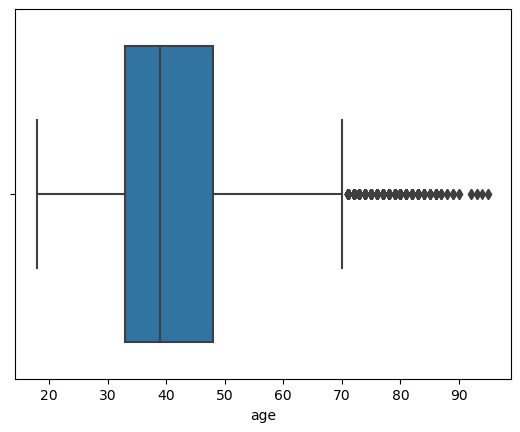

In [26]:
#We check the skewness of age using boxplot
sns.boxplot(x = df_bank.age)

As we can see the 'age' column is heavily skewed by outliers, we will be using median here to fill the missing values

In [27]:
df_bank["age"] = df_bank["age"].fillna(df_bank["age"].median())

In [28]:
df_bank.isna().sum()

customerid           0
age                  0
salary               0
balance              0
marital              0
targeted             0
default              0
housing              0
loan                 0
contact              0
day                  0
campaign             0
pdays                0
previous             0
poutcome             0
response            30
duration_seconds     0
department           0
education            0
Month               50
year                50
dtype: int64

For Month and Response we use mode as the are object type(text data)

In [29]:
mode_month = df_bank["Month"].mode()[0]
df_bank["Month"] = df_bank["Month"].fillna(mode_month)

In [30]:
mode_month = df_bank["year"].mode()[0]
df_bank["year"] = df_bank["year"].fillna(mode_month)

In [31]:
mode_response = df_bank["response"].mode()[0]
df_bank["response"] = df_bank["response"].fillna(mode_response)

In [32]:
df_bank.isna().sum()

customerid          0
age                 0
salary              0
balance             0
marital             0
targeted            0
default             0
housing             0
loan                0
contact             0
day                 0
campaign            0
pdays               0
previous            0
poutcome            0
response            0
duration_seconds    0
department          0
education           0
Month               0
year                0
dtype: int64

2. Descriptive Statistics

A. Derive summary statistics (mean, median, standard deviation) for relevant
columns.

In [33]:
df_bank.describe()

,age,salary,balance,campaign,pdays,previous,duration_seconds
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.934795,57006.171065,1362.272058,2.763841,40.197828,0.580323,257.929420
std,10.616926,32085.718415,3044.765829,3.098021,100.128746,2.303441,257.528105
min,18.000000,0.000000,-8019.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,20000.000000,72.000000,1.000000,-1.000000,0.000000,103.000000
50%,39.000000,60000.000000,448.000000,2.000000,-1.000000,0.000000,180.000000
75%,48.000000,70000.000000,1428.000000,3.000000,-1.000000,0.000000,319.000000
max,95.000000,120000.000000,102127.000000,63.000000,871.000000,275.000000,4918.000000


B. Examine the distribution of the target variable, indicating responses to the
term deposit campaign.

To examine the distribution of the target variable, we can use various visualization techniques. Since the target variable is categorical ('response': 'yes' or 'no'), we can create a count plot or a pie chart to visualize the distribution of responses.

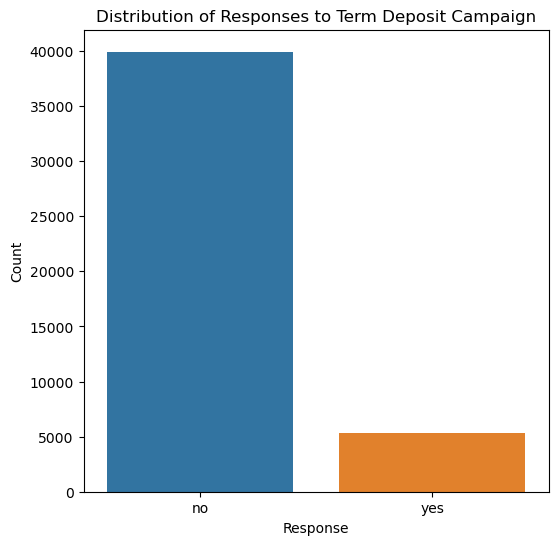

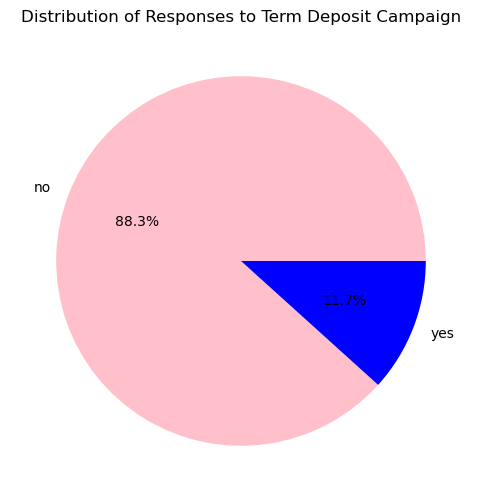

In [34]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df_bank, x='response')
plt.title('Distribution of Responses to Term Deposit Campaign')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 6))
df_bank['response'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'blue'])
plt.title('Distribution of Responses to Term Deposit Campaign')
plt.ylabel('')
plt.show()

3. Univariate Analysis

A. Examine the distribution of individual key features, such as age, balance,
and call duration.

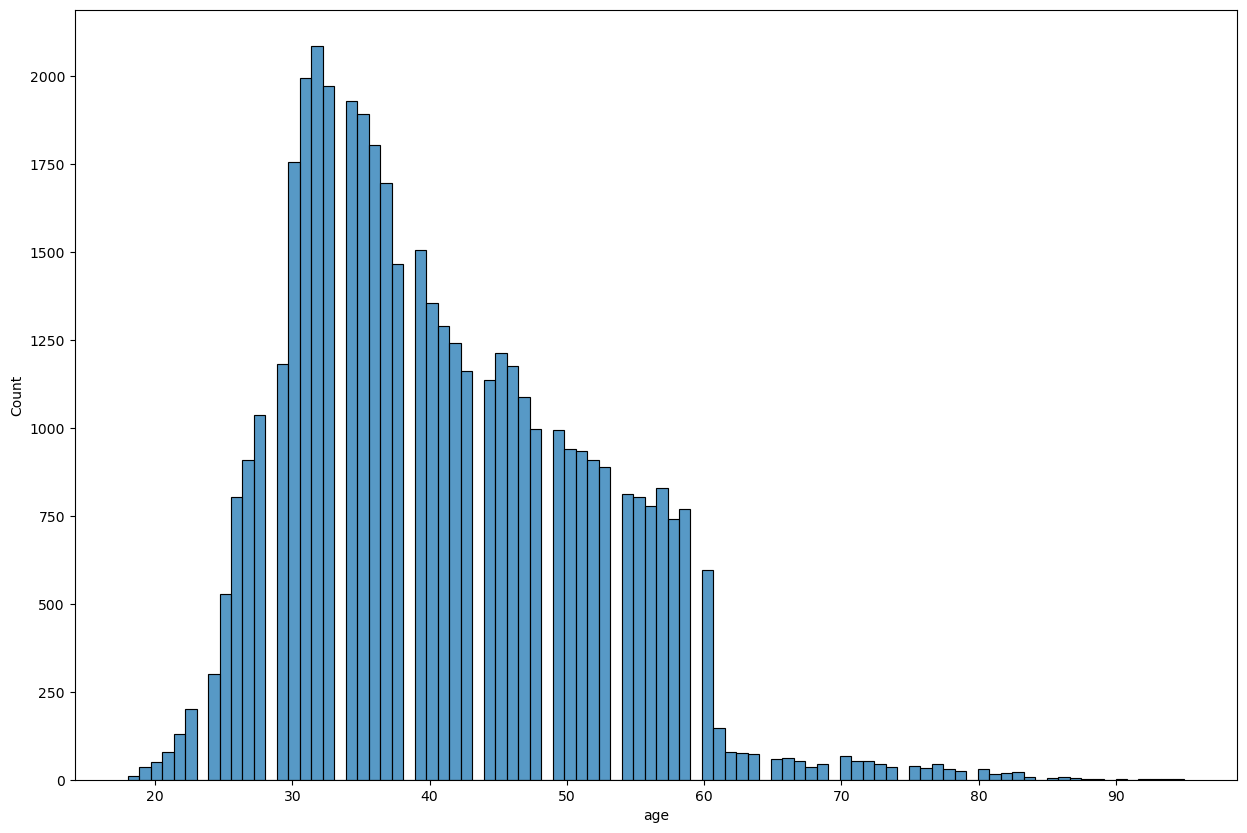

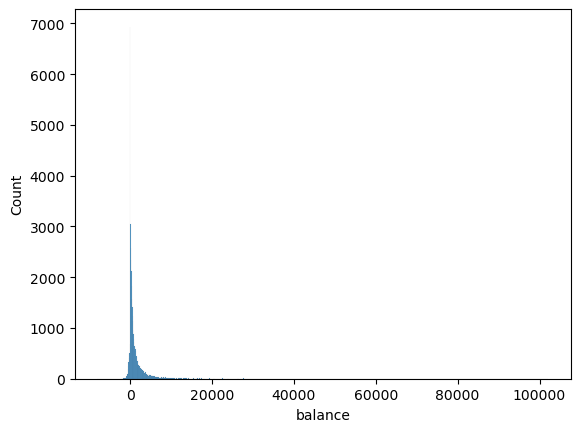

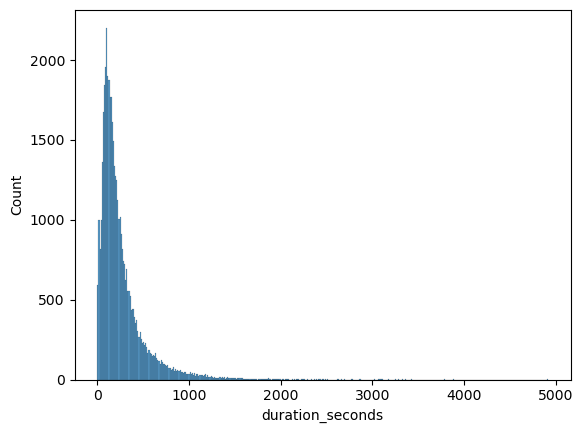

In [35]:
plt.figure(figsize=(15, 10))
key_features = ["age", "balance", "duration_seconds"]
for i in key_features:
    sns.histplot(df_bank[i])
    plt.show()

B. Employ visual aids like histograms, box plots, and kernel density plots to
discern patterns and outliers.

Histograms for Numerical columns like age, salary, balance, campaign, pdays, previous & duration_seconds

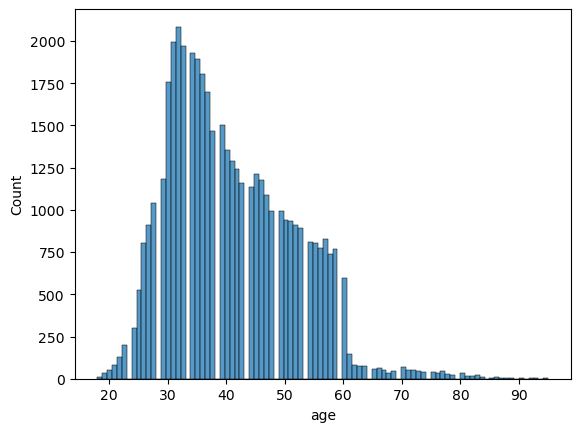

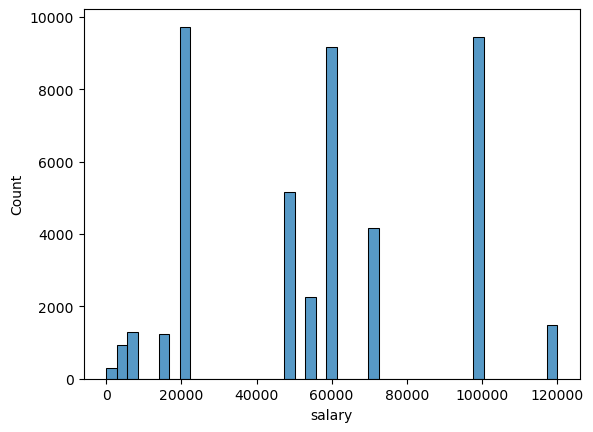

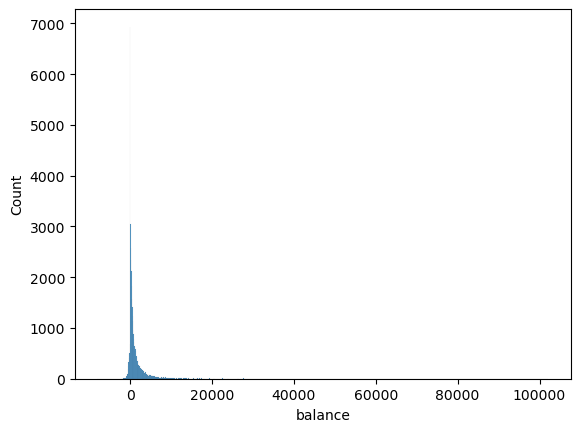

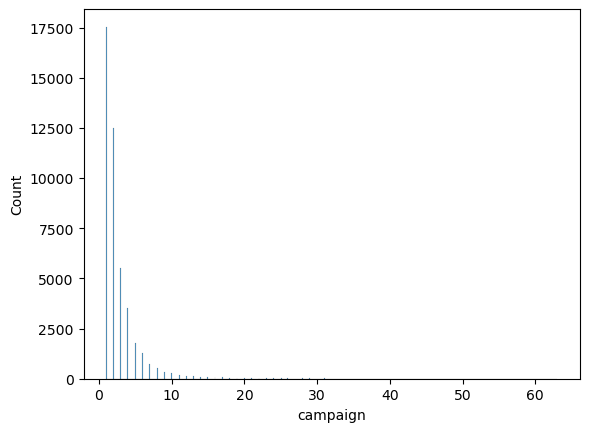

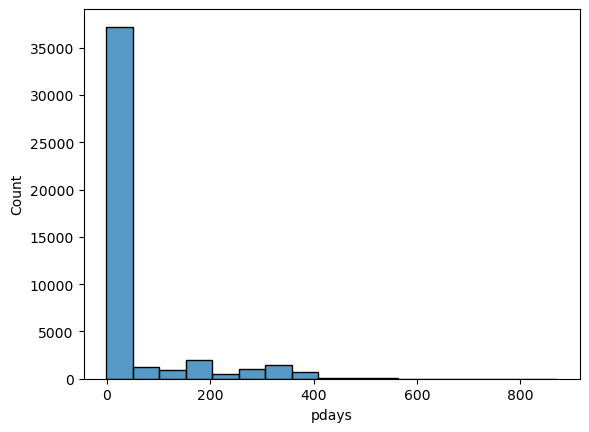

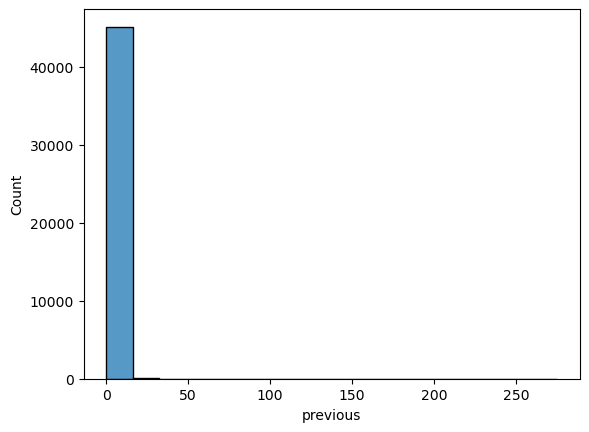

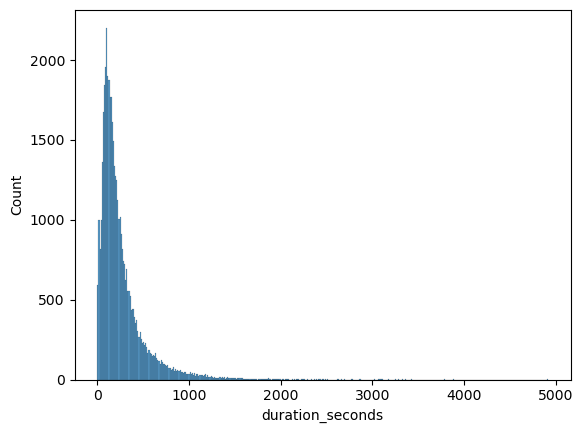

In [36]:
list_num_columns = ["age", "salary", "balance", "campaign", "pdays", "previous", "duration_seconds"]
for i in list_num_columns:
    sns.histplot(df_bank[i])
    plt.show()

Now Boxplot for checking outliers

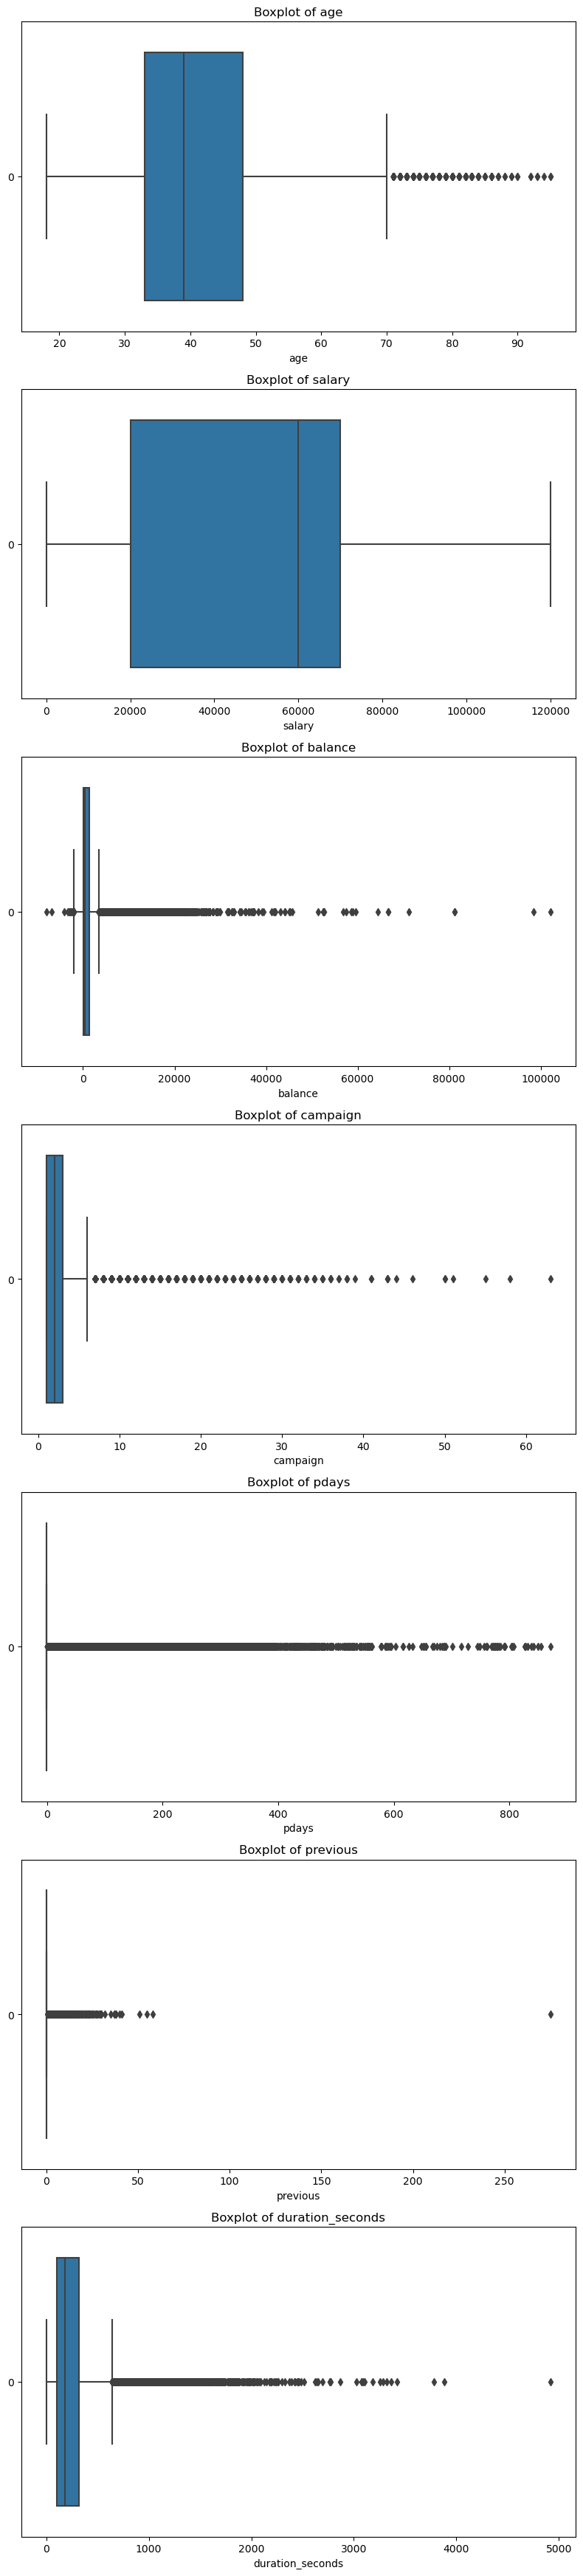

In [37]:
numerical_columns = df_bank.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for each numerical variable separately
plt.figure(figsize=(8, 5 * len(numerical_columns)))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(data=df_bank[column], orient='h')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(f'{column}')

plt.tight_layout()
plt.show()

Kernel Density Plots for contineous variables

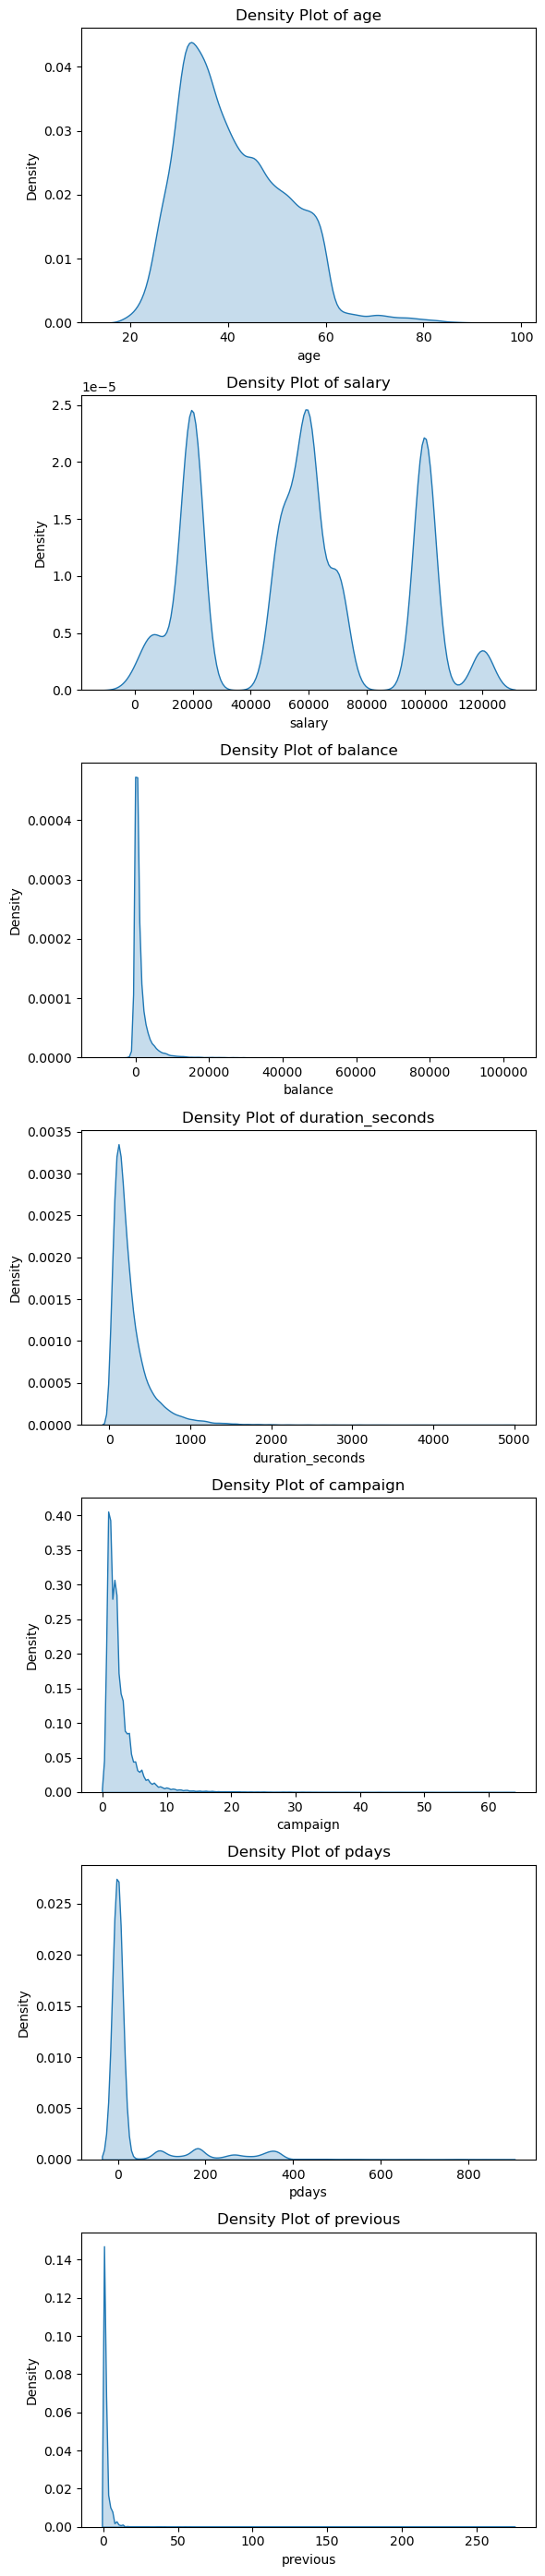

In [38]:
continuous_vars = ['age', 'salary', 'balance', 'duration_seconds', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(6, 4 * len(continuous_vars)))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(len(continuous_vars), 1, i)
    sns.kdeplot(data=df_bank[var], fill=True)
    plt.title(f'Density Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

4. Bivariate Analysis

A. Evaluate the relationship between independent variables and the target variable.

We will be using scatterplot here for Bivariate Analysis

In [39]:
list_all_columns = list(df_bank.columns)
list_all_columns.remove("customerid")
list_all_columns.remove("response")
print(list_all_columns)

['age', 'salary', 'balance', 'marital', 'targeted', 'default', 'housing', 'loan', 'contact', 'day', 'campaign', 'pdays', 'previous', 'poutcome', 'duration_seconds', 'department', 'education', 'Month', 'year']


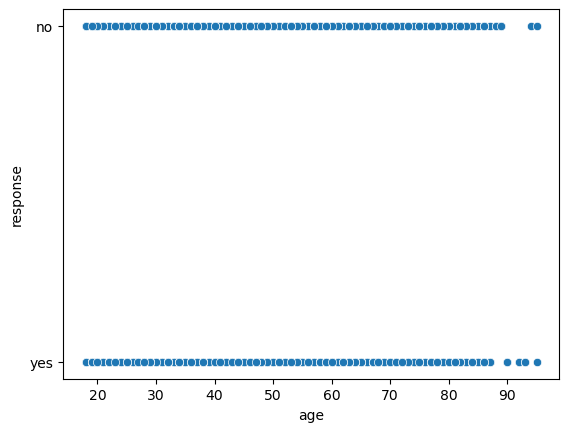

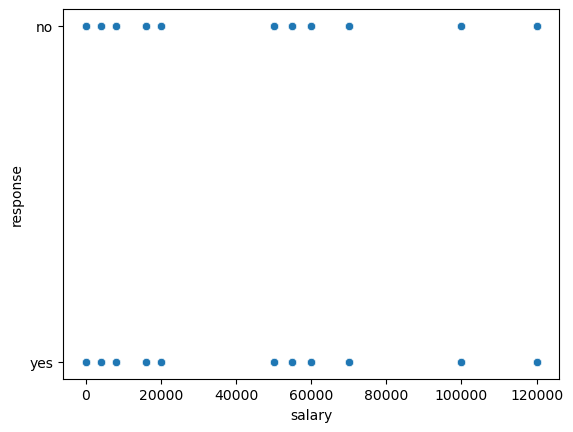

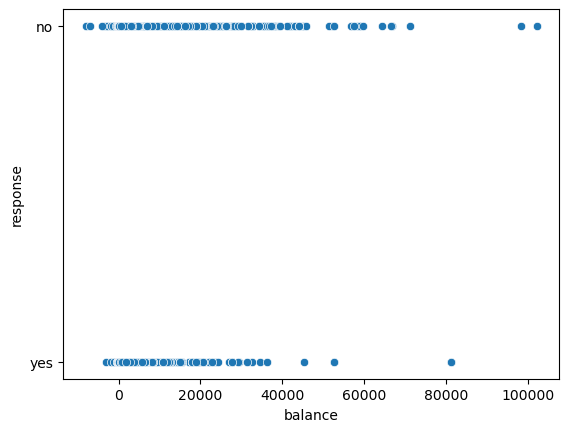

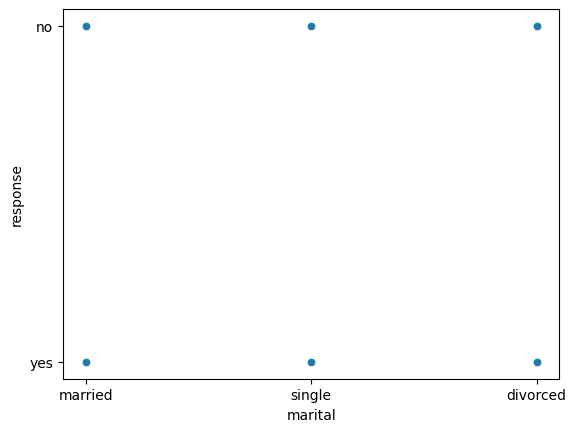

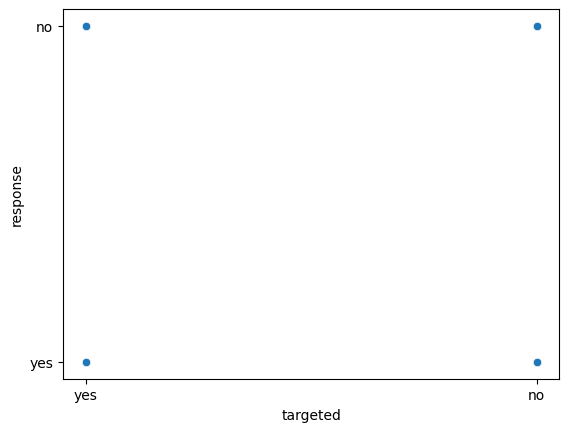

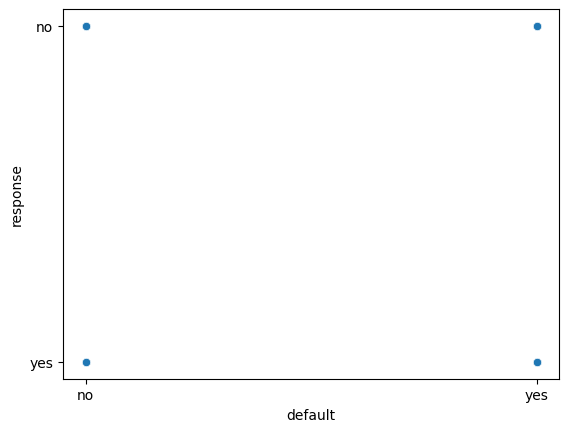

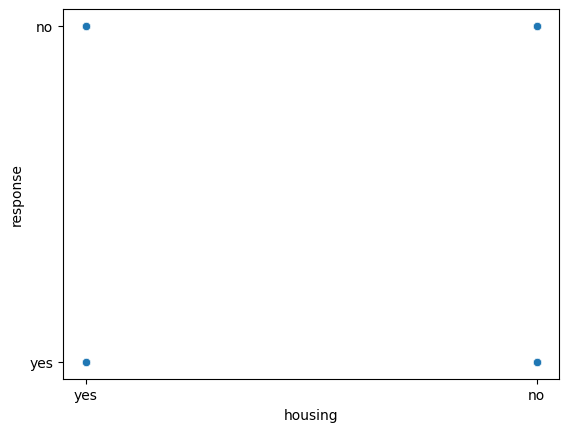

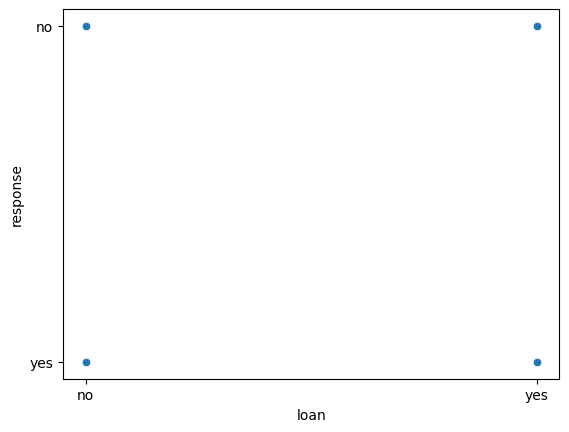

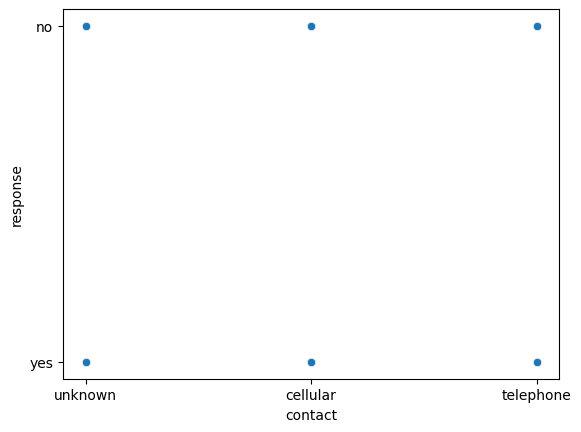

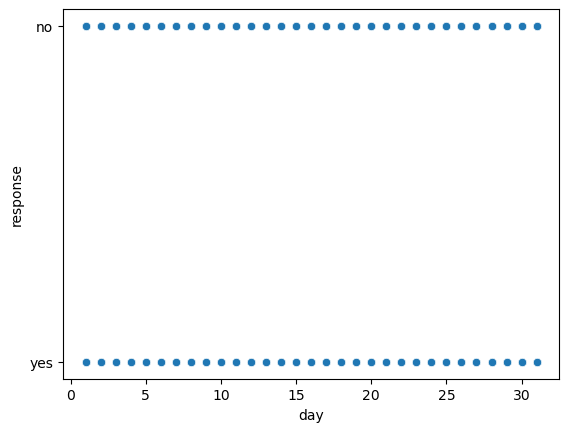

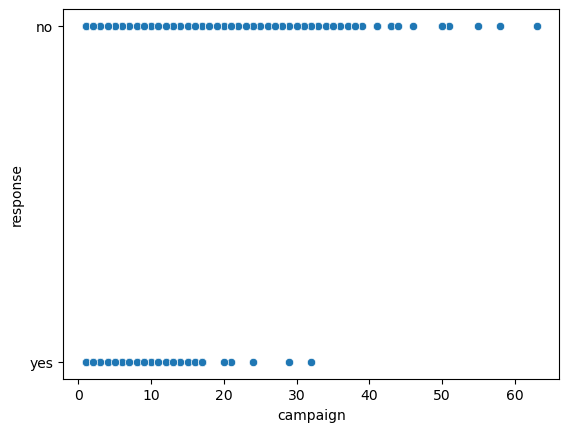

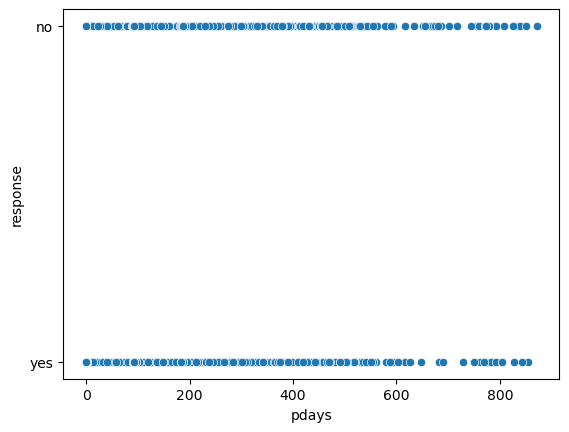

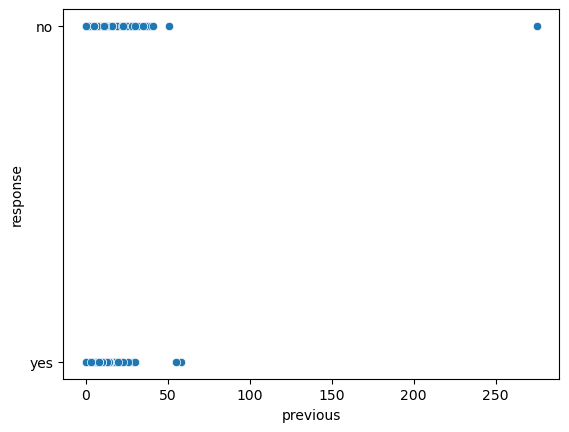

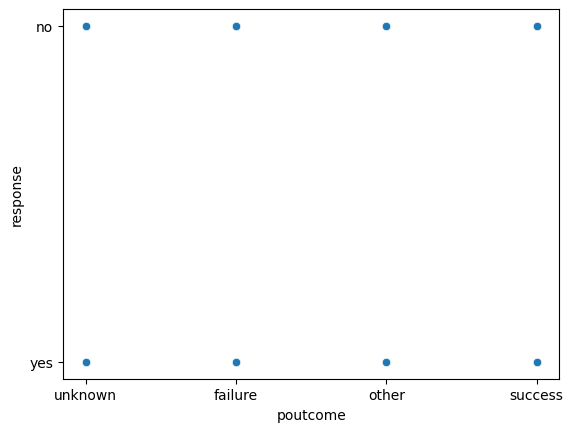

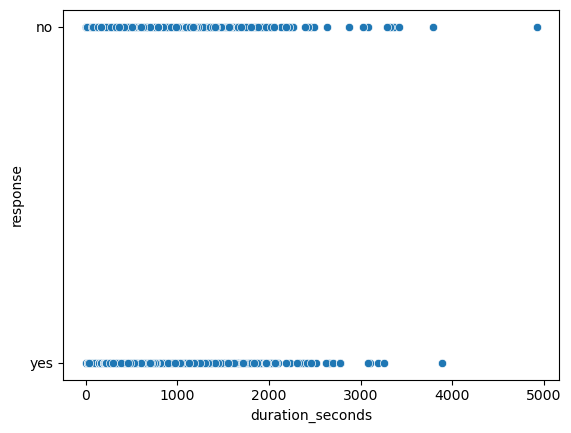

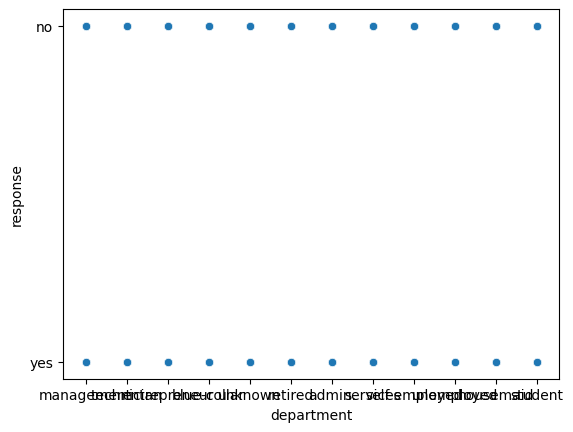

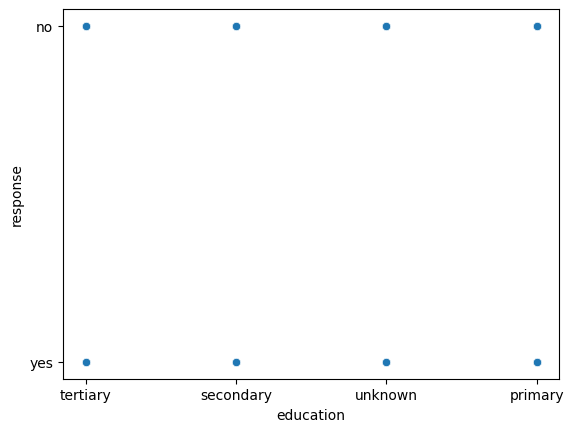

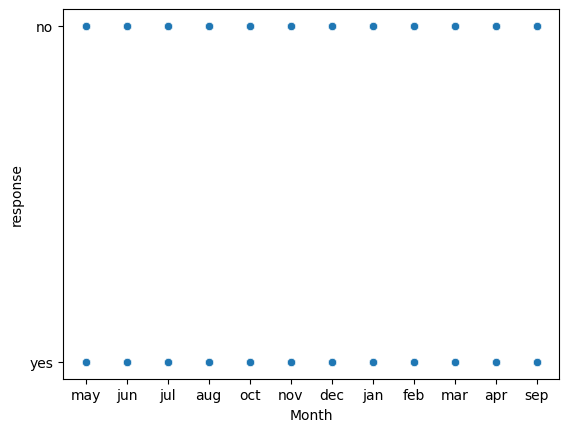

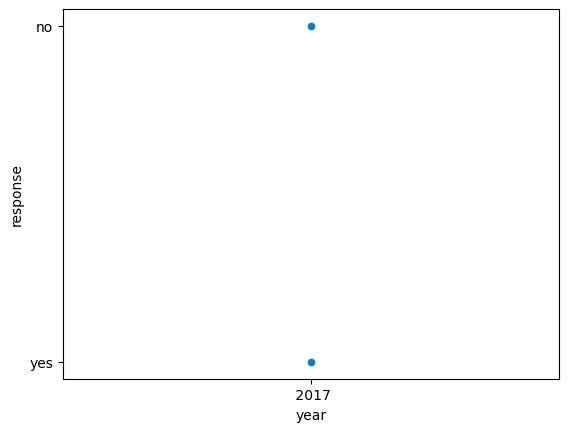

In [40]:
for i in list_all_columns:
    sns.scatterplot(data=df_bank,x=i,y="response")
    plt.show()

B. Analyze how features like age, job type, education, marital status, etc., associate with the success of the term deposit campaign, using
visualizations like bar charts, stacked bar charts, and heatmaps.

BAR CHART for categorical variables

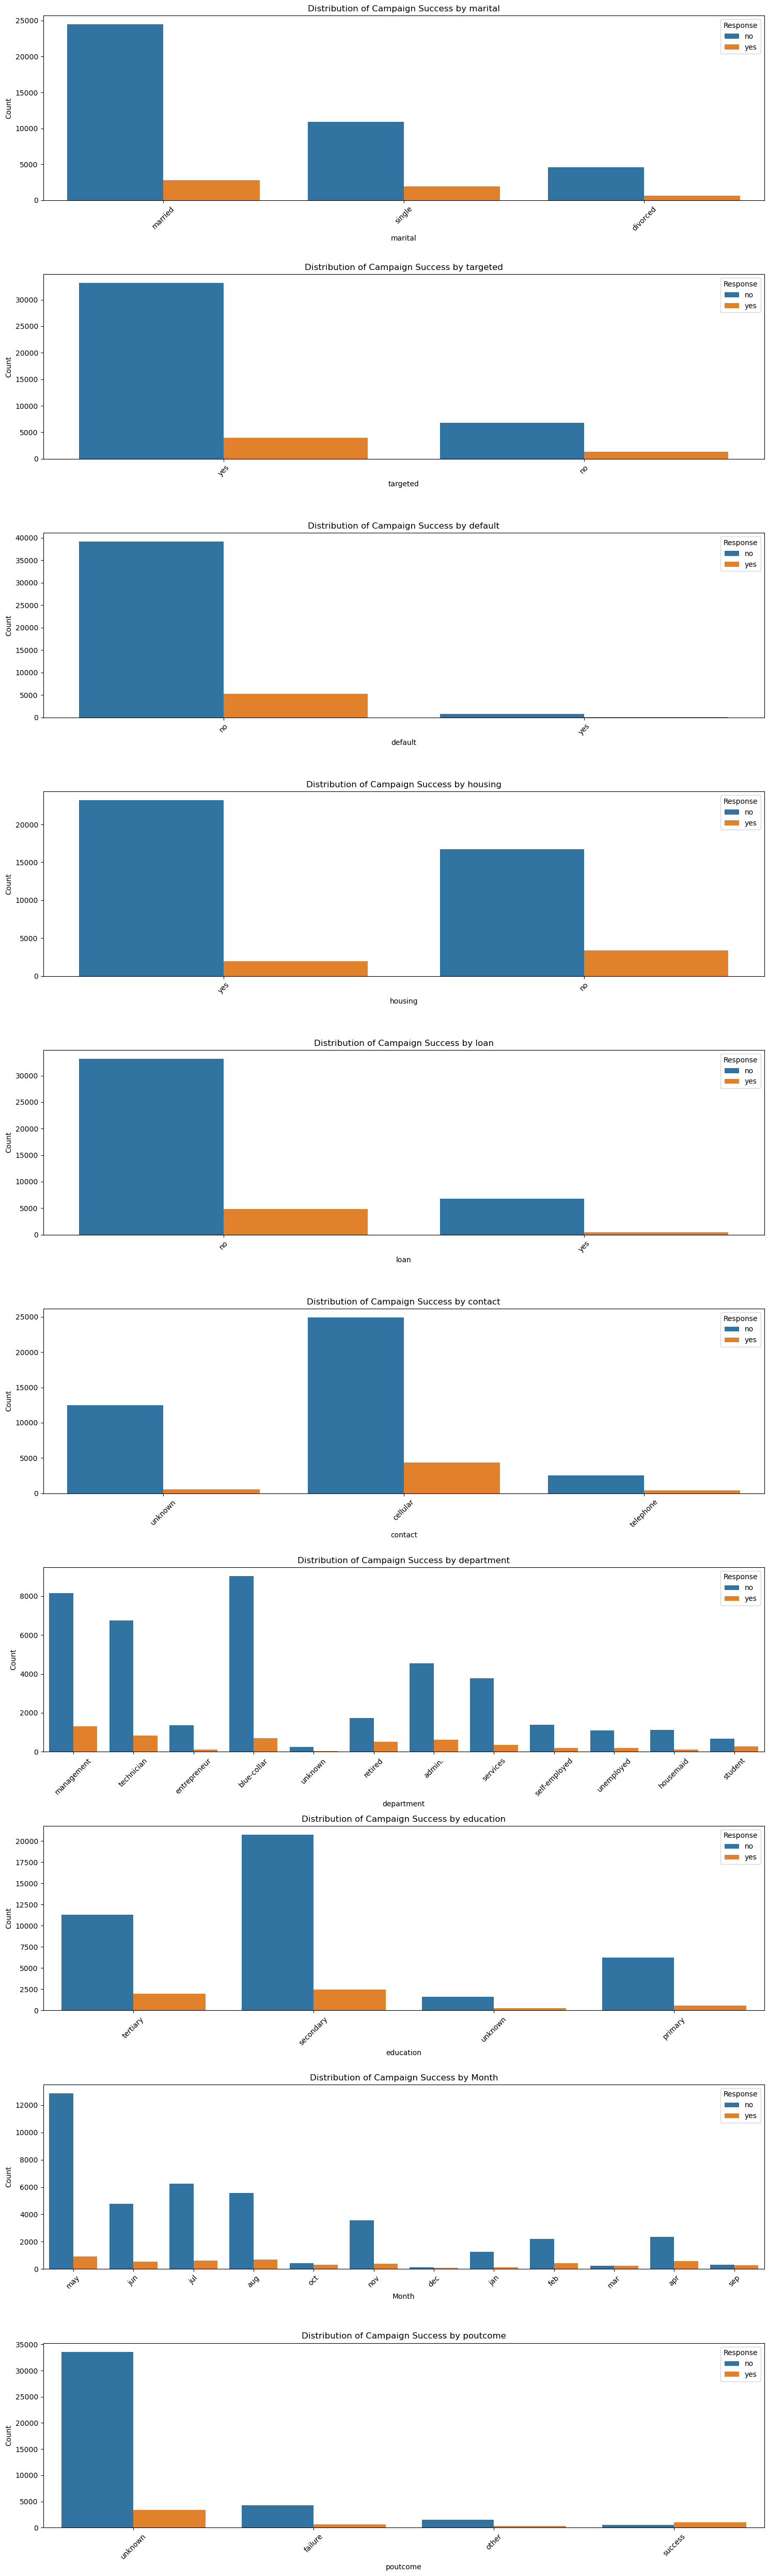

In [41]:
categorical_variables = ['marital', 'targeted', 'default', 'housing', 'loan', 'contact','department','education', 'Month', 'poutcome']
plt.figure(figsize=(15, 5*len(categorical_variables)))
for i, var in enumerate(categorical_variables, 1):
    plt.subplot(len(categorical_variables), 1, i)
    sns.countplot(data=df_bank, x=var, hue='response')
    plt.title(f'Distribution of Campaign Success by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Response', loc='upper right')

plt.tight_layout()
plt.show()

Generating a Heatmap to show relation between two categorical variables

In [42]:
cor = df_bank.corr()
cor

C:\Users\Dr. J P Singh\AppData\Local\Temp\ipykernel_6448\2377237611.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df_bank.corr()


,age,salary,balance,campaign,pdays,previous,duration_seconds
age,1.000000,0.024366,0.097753,0.004851,-0.023795,0.001302,-0.004655
salary,0.024366,1.000000,0.055469,0.015005,-0.014968,0.014564,-0.009992
balance,0.097753,0.055469,1.000000,-0.014578,0.003435,0.016674,0.021543
campaign,0.004851,0.015005,-0.014578,1.000000,-0.088628,-0.032855,-0.084559
pdays,-0.023795,-0.014968,0.003435,-0.088628,1.000000,0.454820,-0.001740
previous,0.001302,0.014564,0.016674,-0.032855,0.454820,1.000000,0.001105
duration_seconds,-0.004655,-0.009992,0.021543,-0.084559,-0.001740,0.001105,1.000000


<Axes: >

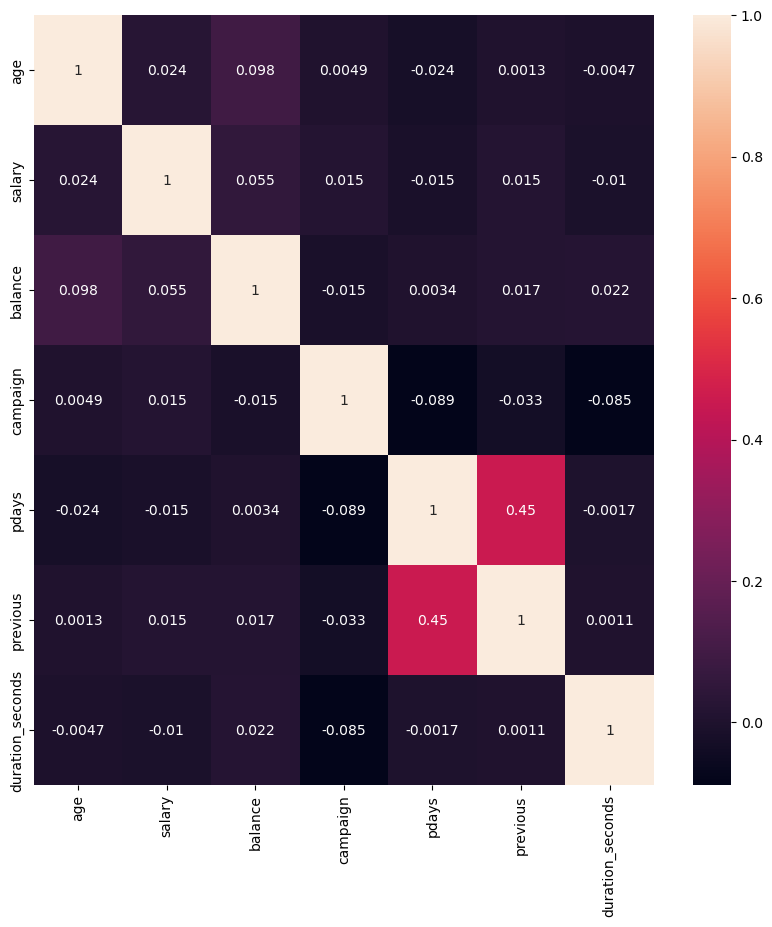

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)

5. Categorical Variables Analysis

A. Investigate the distribution of categorical variables such as job type,
education, and marital status.

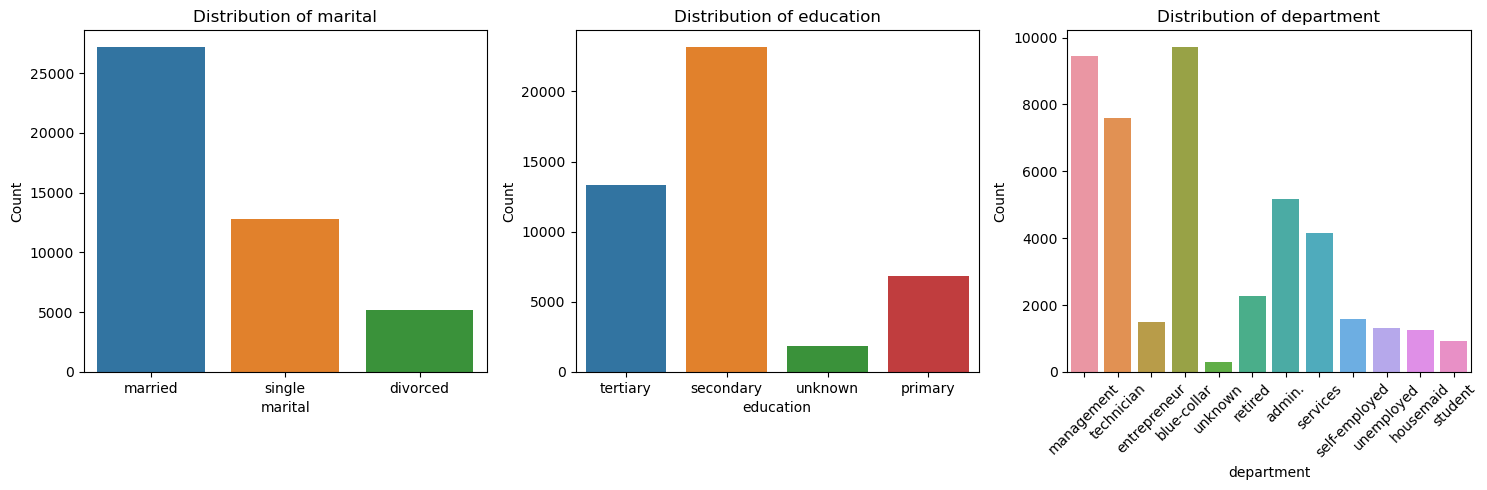

In [44]:
cat_variables = ['marital', 'education', 'department']

# Create countplots for each categorical variable
plt.figure(figsize=(15, 5))
for i, var in enumerate(cat_variables, 1):
    plt.subplot(1, len(cat_variables), i)
    sns.countplot(data=df_bank, x=var)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

B. Assess the impact of these categorical variables on the campaign's
success through visualizations like bar charts.

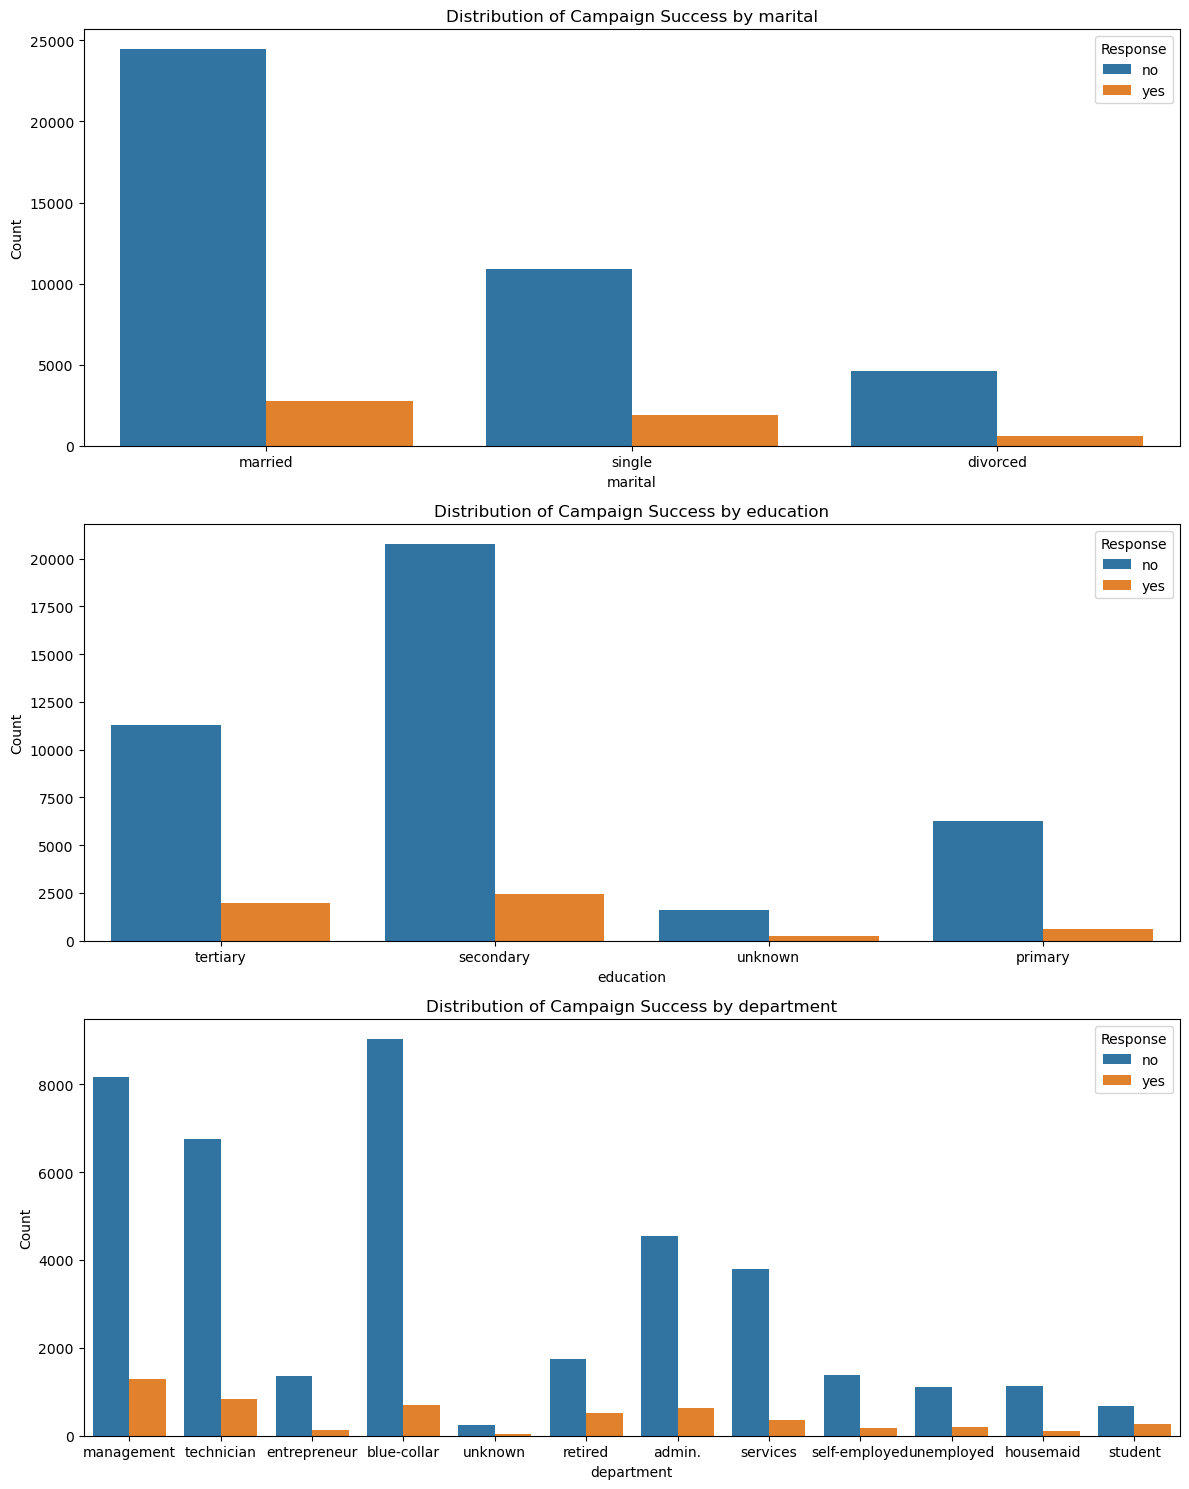

In [45]:
categorical_variables = ['marital', 'education', 'department']

# Create bar charts for each categorical variable
plt.figure(figsize=(12, 5*len(categorical_variables)))
for i, var in enumerate(categorical_variables, 1):
    plt.subplot(len(categorical_variables), 1, i)
    sns.countplot(data=df_bank, x=var, hue='response')
    plt.title(f'Distribution of Campaign Success by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Response', loc='upper right')

plt.tight_layout()
plt.show()

6. Temporal Analysis

A. Investigate temporal patterns of the campaign over time.
We'll be using line plot to visualize temporal patterns

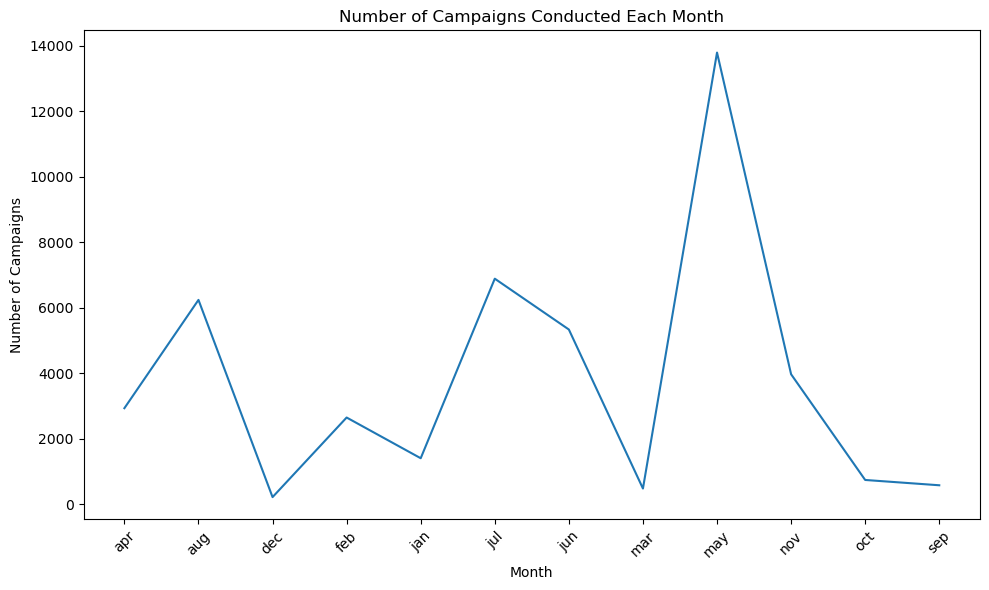

In [46]:
df_bank_sorted = df_bank.sort_values('Month')

# Plot the number of campaigns conducted each month
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_bank_sorted, x='Month', y='campaign', estimator='count', errorbar=None)
plt.title('Number of Campaigns Conducted Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Campaigns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

B. Analyze if specific months or days exhibit superior campaign
performance.

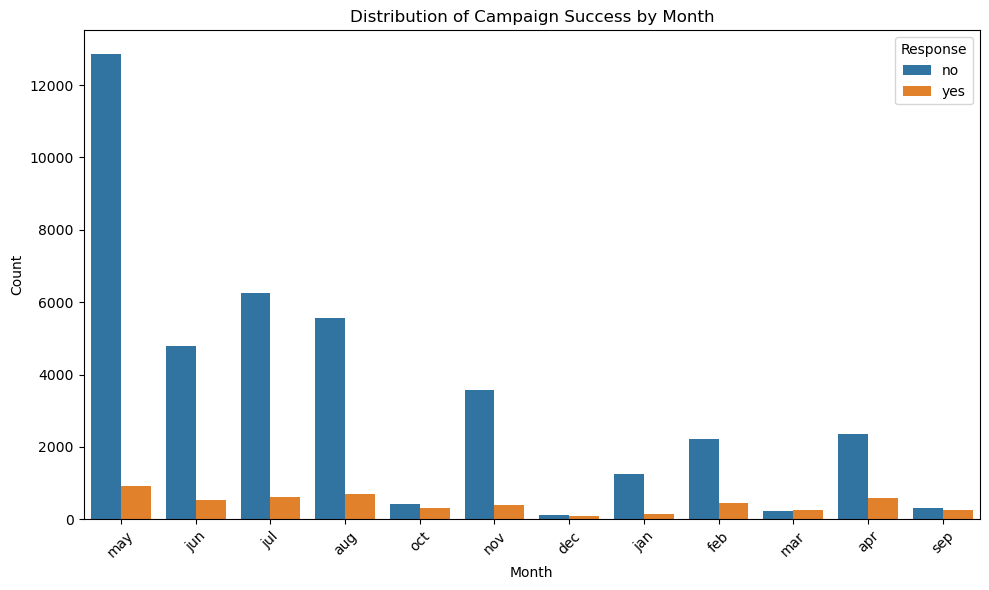

In [47]:
plt.figure(figsize=(10, 6))
#bar plot for the count of successful and unsuccessful responses by month
sns.countplot(data=df_bank, x='Month', hue='response')

# Customize the plot
plt.title('Distribution of Campaign Success by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response', loc='upper right')

plt.tight_layout()
plt.show()

7. Feature Engineering

A. Introduce new features that may enhance prediction, such as creating age
groups or income categories.

In [48]:
salary_stats = df_bank['salary'].describe()

# Print the maximum and minimum salary range
print("Maximum Salary:", salary_stats['max'])
print("Minimum Salary:", salary_stats['min'])

Maximum Salary: 120000.0
Minimum Salary: 0.0


In [49]:
# Create age groups
df_bank['age_group'] = pd.cut(df_bank['age'], bins=[0, 30, 50, 100], labels=['young', 'middle-aged', 'senior'])

# Create income categories
df_bank['income_category'] = pd.cut(df_bank['salary'], bins=[0, 40000, 80000, 120000], labels=['low income', 
                                                                                               'medium income', 'high income'])

In [50]:
df_bank

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,campaign,pdays,previous,poutcome,response,duration_seconds,department,education,Month,year,age_group,income_category
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,1,-1,0,unknown,no,261,management,tertiary,may,2017,senior,high income
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,5,1,-1,0,unknown,no,151,technician,secondary,may,2017,middle-aged,medium income
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,1,-1,0,unknown,no,76,entrepreneur,secondary,may,2017,middle-aged,high income
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,5,1,-1,0,unknown,no,92,blue-collar,unknown,may,2017,middle-aged,low income
4,5,33.0,0,1,single,no,no,no,no,unknown,5,1,-1,0,unknown,no,198,unknown,unknown,may,2017,middle-aged,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,yes,no,no,no,cellular,17,3,-1,0,unknown,yes,976,technician,tertiary,nov,2017,senior,medium income
45207,45208,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,2,-1,0,unknown,yes,456,retired,primary,nov,2017,senior,medium income
45208,45209,72.0,55000,5715,married,yes,no,no,no,cellular,17,5,184,3,success,yes,1126,retired,secondary,nov,2017,senior,medium income
45209,45210,57.0,20000,668,married,yes,no,no,no,telephone,17,4,-1,0,unknown,no,508,blue-collar,secondary,nov,2017,senior,low income


B. Apply encoding techniques to transform categorical variables if necessary.

8. Correlation Analysis

A. Examine correlations between independent variables to identify
multicollinearity.

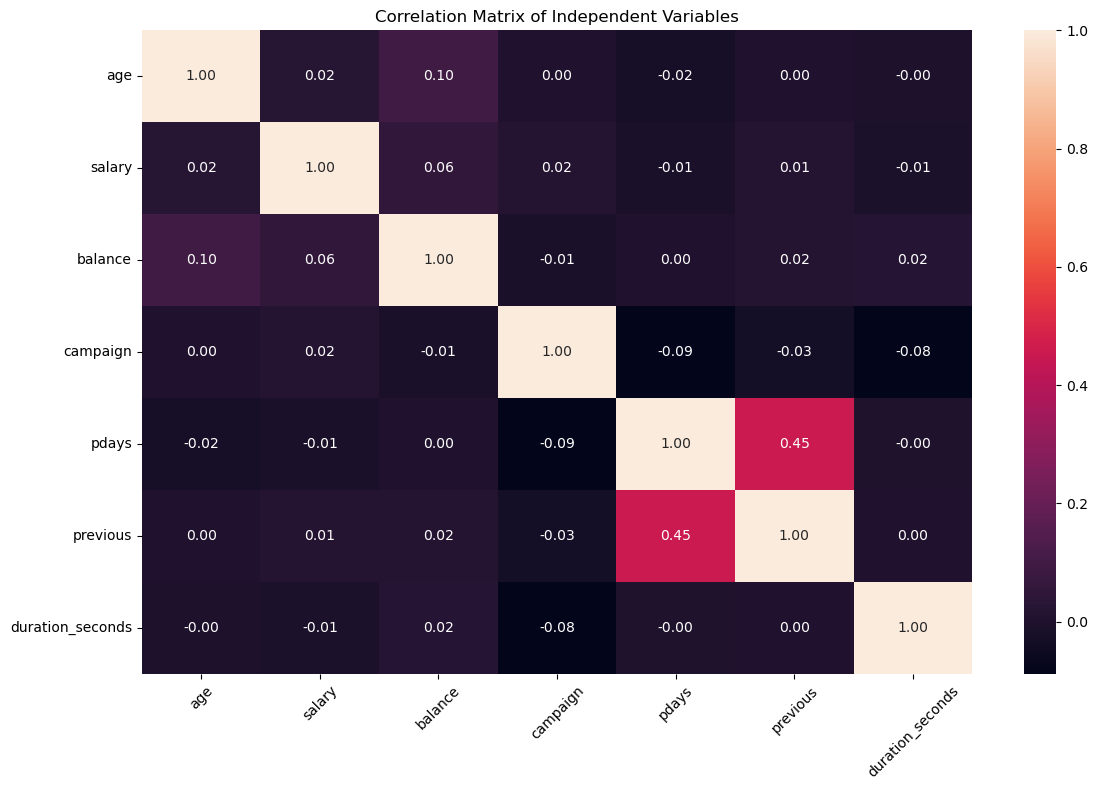

In [51]:
independent_variables = ['age', 'salary', 'balance', 'campaign', 'pdays', 'previous', 'duration_seconds']

# Compute correlation matrix
correlation_matrix = df_bank[independent_variables].corr()
plt.figure(figsize=(12, 8))

# Plot correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Independent Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

B. Evaluate how correlated features may influence the target variable.

As response column includes string data, so first we need to change it to integer or numerical data

In [52]:
print(df_bank['response'].dtype)

# If 'response' is stored as a string, convert it to a numerical type (e.g., 0 for 'no' and 1 for 'yes')
df_bank['response'] = df_bank['response'].map({'no': 0, 'yes': 1})
print(df_bank['response'].dtype)

object
int64


As we have converted it, now we will correlate features

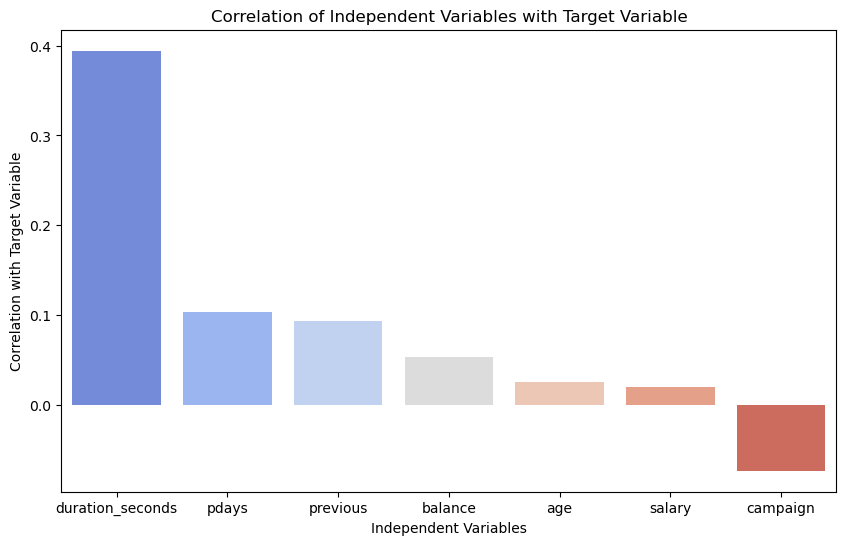

In [53]:
correlation_with_target = df_bank[independent_variables].corrwith(df_bank['response'])

# Sort correlations in descending order
correlation_with_target = correlation_with_target.sort_values(ascending=False)

# Plot correlations
plt.figure(figsize=(10, 6))
sns.barplot(y=correlation_with_target, x=correlation_with_target.index, palette='coolwarm')
plt.xlabel('Independent Variables')
plt.ylabel('Correlation with Target Variable')
plt.title('Correlation of Independent Variables with Target Variable')
plt.show()

9. Outlier Detection and Handling

A. Identify and rectify outliers that could impact the analysis and predictions.

Here we will handle outliers using the interquartile range (IQR) method:

<Axes: xlabel='age'>

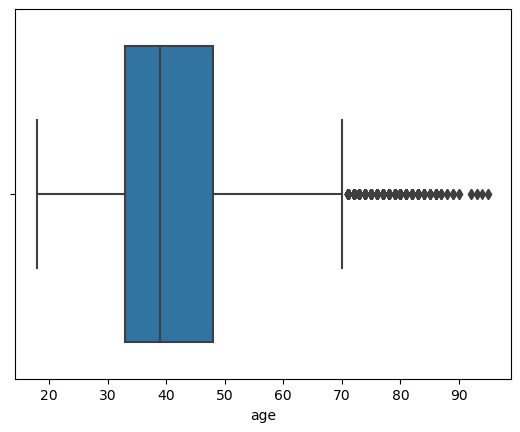

In [54]:
sns.boxplot(x = df_bank.age)

In [55]:
# Calculate IQR
Q1 = df_bank['age'].quantile(0.25)
Q3 = df_bank['age'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_bank[(df_bank['age'] < lower_bound) | (df_bank['age'] > upper_bound)]
df_bank.loc[(df_bank['age'] < lower_bound) | (df_bank['age'] > upper_bound), 'age'] = df_bank['age'].median()

<Axes: xlabel='age'>

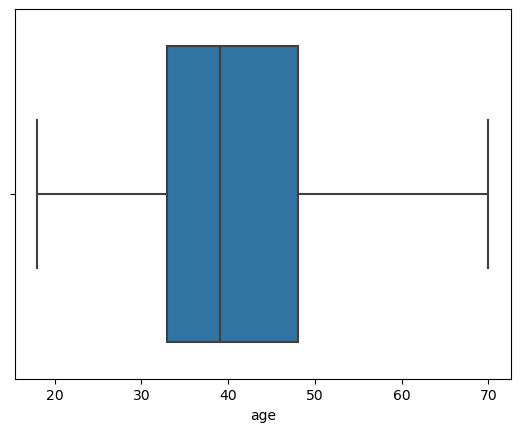

In [56]:
sns.boxplot(x = df_bank.age)

<Axes: xlabel='salary'>

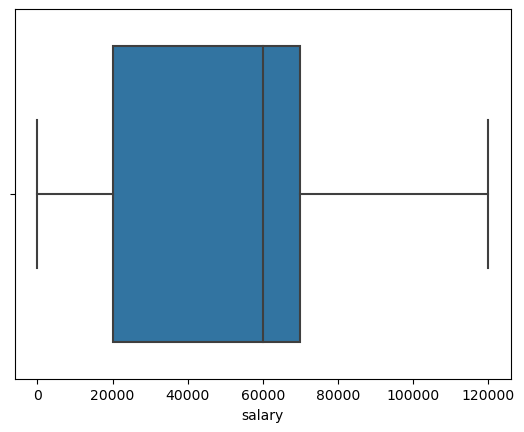

In [57]:
sns.boxplot(x = df_bank.salary)

<Axes: xlabel='balance'>

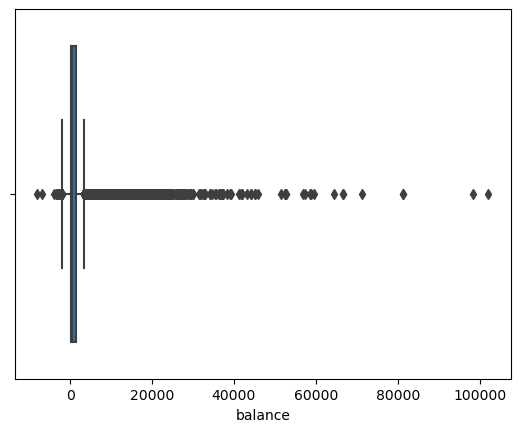

In [58]:
sns.boxplot(x = df_bank.balance)

In [59]:
# Calculate IQR
Q1 = df_bank['balance'].quantile(0.25)
Q3 = df_bank['balance'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_bank[(df_bank['balance'] < lower_bound) | (df_bank['balance'] > upper_bound)]
df_bank.loc[(df_bank['balance'] < lower_bound) | (df_bank['balance'] > upper_bound), 'balance'] = df_bank['balance'].median()

<Axes: xlabel='balance'>

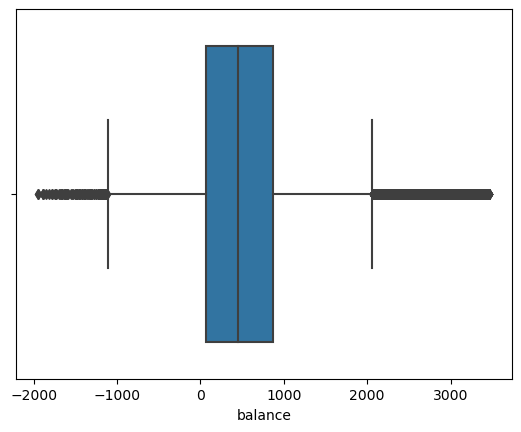

In [60]:
sns.boxplot(x = df_bank.balance)

<Axes: xlabel='campaign'>

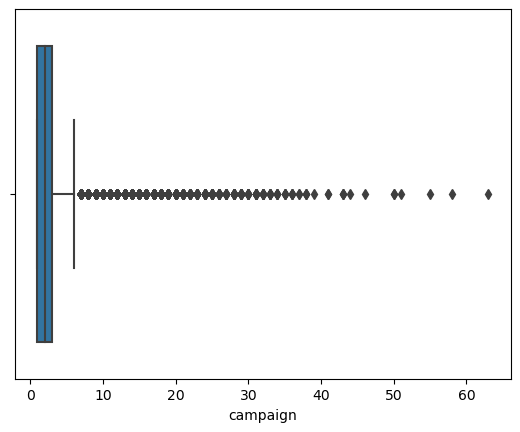

In [61]:
sns.boxplot(x = df_bank.campaign)

In [62]:
# Calculate IQR
Q1 = df_bank['campaign'].quantile(0.25)
Q3 = df_bank['campaign'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_bank[(df_bank['campaign'] < lower_bound) | (df_bank['campaign'] > upper_bound)]
df_bank.loc[(df_bank['campaign'] < lower_bound) | (df_bank['campaign'] > upper_bound), 'campaign'] = df_bank['campaign'].median()

<Axes: xlabel='campaign'>

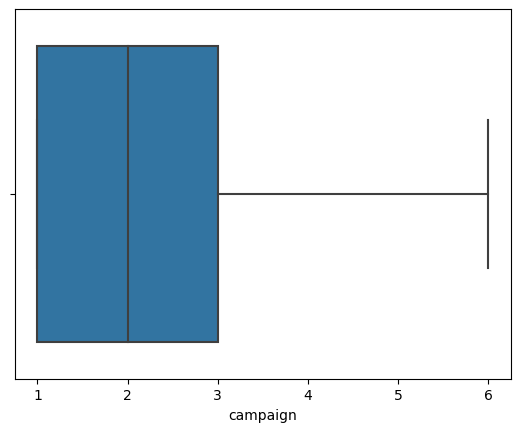

In [63]:
sns.boxplot(x = df_bank.campaign)

<Axes: xlabel='pdays'>

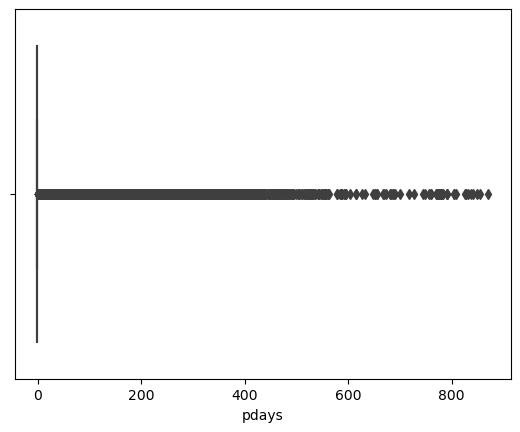

In [64]:
sns.boxplot(x = df_bank.pdays)

In [65]:
# Calculate IQR
Q1 = df_bank['pdays'].quantile(0.25)
Q3 = df_bank['pdays'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_bank[(df_bank['pdays'] < lower_bound) | (df_bank['pdays'] > upper_bound)]
df_bank.loc[(df_bank['pdays'] < lower_bound) | (df_bank['pdays'] > upper_bound), 'pdays'] = df_bank['pdays'].median()

<Axes: xlabel='pdays'>

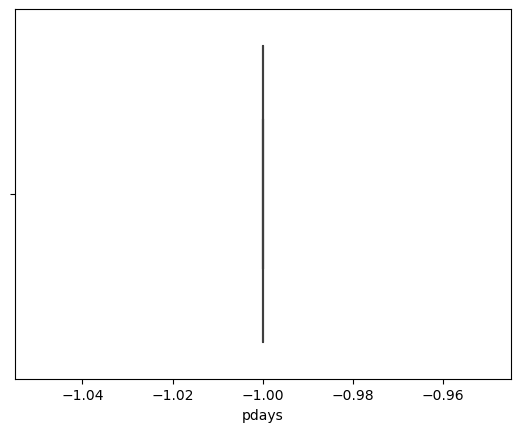

In [66]:
sns.boxplot(x = df_bank.pdays)

<Axes: xlabel='previous'>

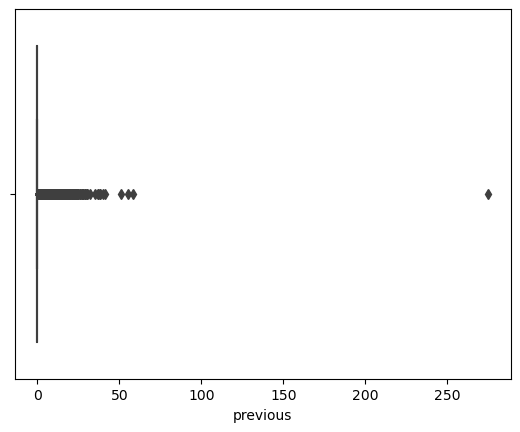

In [67]:
sns.boxplot(x = df_bank.previous)

In [68]:
# Calculate IQR
Q1 = df_bank['previous'].quantile(0.25)
Q3 = df_bank['previous'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_bank[(df_bank['previous'] < lower_bound) | (df_bank['previous'] > upper_bound)]
df_bank.loc[(df_bank['previous'] < lower_bound) | (df_bank['previous'] > upper_bound), 'previous'] = df_bank['previous'].median()

<Axes: xlabel='previous'>

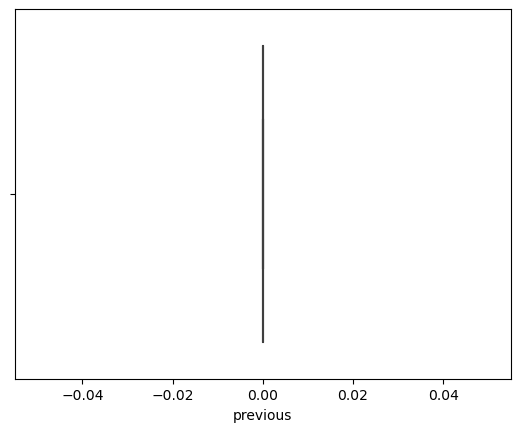

In [69]:
sns.boxplot(x = df_bank.previous)

<Axes: xlabel='duration_seconds'>

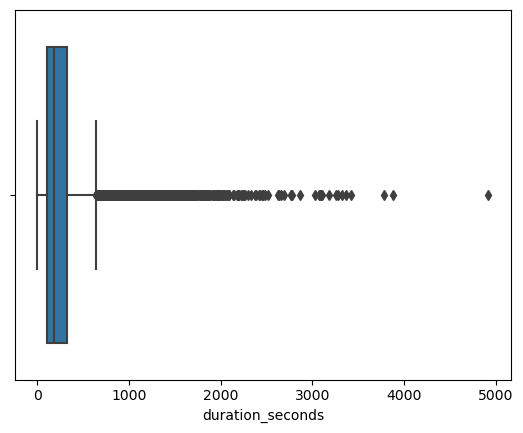

In [70]:
sns.boxplot(x = df_bank.duration_seconds)

In [71]:
# Calculate IQR
Q1 = df_bank['duration_seconds'].quantile(0.25)
Q3 = df_bank['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_bank[(df_bank['duration_seconds'] < lower_bound) | (df_bank['duration_seconds'] > upper_bound)]
df_bank.loc[(df_bank['duration_seconds'] < lower_bound) | (df_bank['duration_seconds'] > upper_bound), 'duration_seconds'] = df_bank['duration_seconds'].median()

<Axes: xlabel='duration_seconds'>

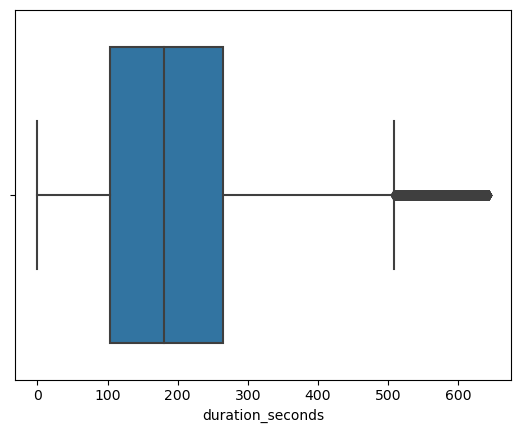

In [72]:
sns.boxplot(x = df_bank.duration_seconds)

In [74]:
df_bank

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,campaign,pdays,previous,poutcome,response,duration_seconds,department,education,Month,year,age_group,income_category
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,1,-1,0,unknown,0,261,management,tertiary,may,2017,senior,high income
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,5,1,-1,0,unknown,0,151,technician,secondary,may,2017,middle-aged,medium income
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,1,-1,0,unknown,0,76,entrepreneur,secondary,may,2017,middle-aged,high income
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,5,1,-1,0,unknown,0,92,blue-collar,unknown,may,2017,middle-aged,low income
4,5,33.0,0,1,single,no,no,no,no,unknown,5,1,-1,0,unknown,0,198,unknown,unknown,may,2017,middle-aged,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,yes,no,no,no,cellular,17,3,-1,0,unknown,1,180,technician,tertiary,nov,2017,senior,medium income
45207,45208,39.0,55000,1729,divorced,yes,no,no,no,cellular,17,2,-1,0,unknown,1,456,retired,primary,nov,2017,senior,medium income
45208,45209,39.0,55000,448,married,yes,no,no,no,cellular,17,5,-1,0,success,1,180,retired,secondary,nov,2017,senior,medium income
45209,45210,57.0,20000,668,married,yes,no,no,no,telephone,17,4,-1,0,unknown,0,508,blue-collar,secondary,nov,2017,senior,low income


In [75]:
df_bank.groupby("marital").mean()

C:\Users\Dr. J P Singh\AppData\Local\Temp\ipykernel_6448\1347446068.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bank.groupby("marital").mean()


,age,salary,balance,campaign,pdays,previous,response,duration_seconds
marital,,,,,,,,
divorced,44.954484,60518.724794,564.070098,2.090263,-1.0,0.0,0.119455,201.205877
married,42.903506,56201.256706,634.468031,2.167598,-1.0,0.0,0.101198,199.651393
single,33.669507,57288.819390,613.706177,2.034871,-1.0,0.0,0.149414,206.244175


In [76]:
df_bank.groupby("targeted").mean()

C:\Users\Dr. J P Singh\AppData\Local\Temp\ipykernel_6448\2272722131.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bank.groupby("targeted").mean()


,age,salary,balance,campaign,pdays,previous,response,duration_seconds
targeted,,,,,,,,
no,38.047783,72289.285714,680.944704,2.086946,-1.0,0.0,0.164286,203.555172
yes,41.070314,53660.375832,607.251274,2.128630,-1.0,0.0,0.106576,201.288372


In [77]:
df_bank.groupby("housing").mean()

C:\Users\Dr. J P Singh\AppData\Local\Temp\ipykernel_6448\1656065558.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bank.groupby("housing").mean()


,age,salary,balance,campaign,pdays,previous,response,duration_seconds
housing,,,,,,,,
no,42.241970,58763.657188,673.149993,2.166077,-1.0,0.0,0.166974,201.705194
yes,39.157421,55601.790688,578.404417,2.085237,-1.0,0.0,0.076960,201.687744


In [78]:
df_bank.groupby("loan").mean()

C:\Users\Dr. J P Singh\AppData\Local\Temp\ipykernel_6448\1901936889.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bank.groupby("loan").mean()


,age,salary,balance,campaign,pdays,previous,response,duration_seconds
loan,,,,,,,,
no,40.525167,56757.420918,651.836885,2.121421,-1.0,0.0,0.126505,202.471778
yes,40.539481,58309.911651,456.175732,2.119685,-1.0,0.0,0.066814,197.626864


In [80]:
df_bank.groupby("contact").mean()

C:\Users\Dr. J P Singh\AppData\Local\Temp\ipykernel_6448\1805236746.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bank.groupby("contact").mean()


,age,salary,balance,campaign,pdays,previous,response,duration_seconds
contact,,,,,,,,
cellular,40.067748,59668.567526,631.08069,2.117944,-1.0,0.0,0.149121,205.702749
telephone,44.838954,52029.249828,737.82106,2.355471,-1.0,0.0,0.134205,177.769443
unknown,40.599155,52128.648233,570.47020,2.076037,-1.0,0.0,0.040707,198.022427


In [81]:
df_bank.groupby("poutcome").mean()

C:\Users\Dr. J P Singh\AppData\Local\Temp\ipykernel_6448\1321647403.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bank.groupby("poutcome").mean()


,age,salary,balance,campaign,pdays,previous,response,duration_seconds
poutcome,,,,,,,,
failure,40.298102,57530.299939,691.367476,1.855948,-1.0,0.0,0.126097,200.843501
other,39.019022,56326.630435,683.458152,2.154348,-1.0,0.0,0.166848,203.699457
success,40.908670,59129.053607,882.978822,1.727333,-1.0,0.0,0.647253,254.107876
unknown,40.617387,56883.708975,597.221029,2.170757,-1.0,0.0,0.091561,199.565924


In [82]:
df_bank.groupby("department").mean()

C:\Users\Dr. J P Singh\AppData\Local\Temp\ipykernel_6448\1162912006.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bank.groupby("department").mean()


,age,salary,balance,campaign,pdays,previous,response,duration_seconds
department,,,,,,,,
admin.,39.270934,50000.0,578.952040,1.992845,-1.0,0.0,0.121833,201.663508
blue-collar,40.031956,20000.0,580.241060,2.144472,-1.0,0.0,0.072750,204.070386
entrepreneur,42.134499,120000.0,593.401479,2.152656,-1.0,0.0,0.082717,203.554808
housemaid,45.893548,16000.0,604.078226,2.227419,-1.0,0.0,0.087903,186.819355
management,40.397759,100000.0,677.669803,2.170755,-1.0,0.0,0.137556,197.450307
retired,54.345848,55000.0,798.044170,2.015459,-1.0,0.0,0.227915,220.563163
self-employed,40.343889,60000.0,667.754275,2.146295,-1.0,0.0,0.117796,201.917036
services,38.745065,70000.0,535.734714,2.094367,-1.0,0.0,0.088830,201.943669
student,26.542644,4000.0,704.994670,1.955224,-1.0,0.0,0.286780,205.049041


In [83]:
df_bank.groupby("education").mean()

C:\Users\Dr. J P Singh\AppData\Local\Temp\ipykernel_6448\3118860108.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bank.groupby("education").mean()


,age,salary,balance,campaign,pdays,previous,response,duration_seconds
education,,,,,,,,
primary,44.638155,34212.377755,606.632025,2.177930,-1.0,0.0,0.086265,197.738432
secondary,39.750194,49743.815188,583.668175,2.098138,-1.0,0.0,0.105551,204.288208
tertiary,39.358845,82873.618525,683.703631,2.143749,-1.0,0.0,0.149989,199.185324
unknown,43.443726,46558.427571,678.826602,2.037157,-1.0,0.0,0.135703,201.879375


In [85]:
df_bank.groupby("Month").mean()

C:\Users\Dr. J P Singh\AppData\Local\Temp\ipykernel_6448\26022357.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bank.groupby("Month").mean()


,age,salary,balance,campaign,pdays,previous,response,duration_seconds
Month,,,,,,,,
apr,38.996247,54339.133402,753.395428,1.858069,-1.0,0.0,0.196861,227.941658
aug,42.469231,64895.673077,620.781571,2.616987,-1.0,0.0,0.110256,185.978205
dec,40.836449,58892.523364,844.771028,2.032710,-1.0,0.0,0.467290,245.518692
feb,40.042706,55996.976568,648.256236,2.051776,-1.0,0.0,0.165911,194.368103
jan,39.987161,57116.262482,611.129815,1.650499,-1.0,0.0,0.101284,213.920114
jul,40.832317,57988.675958,485.697154,2.321138,-1.0,0.0,0.090883,202.808362
jun,42.316401,53657.544517,721.405061,2.141143,-1.0,0.0,0.101968,189.694845
mar,40.207983,60243.697479,877.594538,1.880252,-1.0,0.0,0.518908,209.407563
may,38.837139,52508.081467,529.063347,2.055374,-1.0,0.0,0.067406,206.799014
